In [1]:
# Configure tensorflow and GPU
import tensorflow as tf
gpus = tf.config.list_physical_devices("GPU")
print(f"Number of GPUs available: {len(gpus)}")
try:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
except:
    pass

Number of GPUs available: 1


In [2]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import numpy as np

In [3]:
# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# Input image
input_img = keras.Input(shape=(784,))
# "encoded" is tne encoded representation of the input
encoded = layers.Dense(encoding_dim, activation="relu")(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation="sigmoid")(encoded)

In [4]:
# Create an auto encoder model
autoencoder = keras.Model(input_img, decoded)

In [5]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [6]:
# Decoder model
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [7]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [8]:
# Load the data
(X_train, _), (X_test, _) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [9]:
# Normalize all the values between 0 and 1 and flatten into vectors of size 784
X_train = X_train.astype('float32') / 255
X_test = X_train.astype('float32') / 255
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_train.reshape((len(X_train), np.prod(X_test.shape[1:])))

In [10]:
autoencoder.fit(
    X_train, X_train,
    epochs=50,
    batch_size=256,
    shuffle=True,
    validation_data=(X_test, X_test)
)

Epoch 1/50
235/235 [==============================] - 2s 4ms/step - loss: 0.3753 - val_loss: 0.1943
Epoch 2/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1824 - val_loss: 0.1561
Epoch 3/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1504 - val_loss: 0.1355
Epoch 4/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1320 - val_loss: 0.1230
Epoch 5/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1206 - val_loss: 0.1145
Epoch 6/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1129 - val_loss: 0.1085
Epoch 7/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1074 - val_loss: 0.1045
Epoch 8/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1034 - val_loss: 0.1010
Epoch 9/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1004 - val_loss: 0.0987
Epoch 10/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0981 - val_loss: 0.0969

In [11]:
# Test the model
encoded_imgs = encoder.predict(X_test)
decoded_imgs = decoder.predict(encoded_imgs)

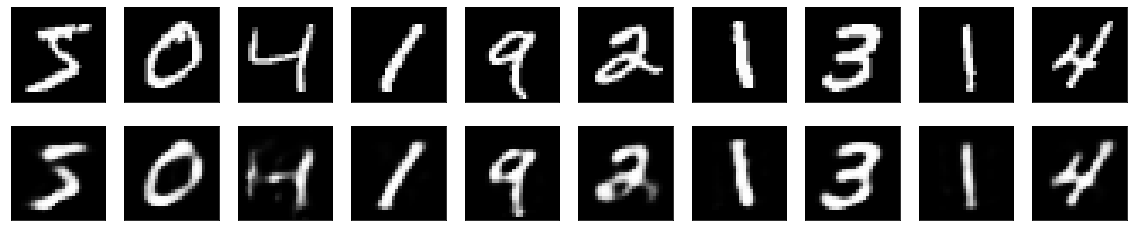

In [12]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20,4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

**Adding a sparsity constrain on the encoded representations**

In [13]:
from tensorflow.keras import regularizers

encoding_dim = 32

input_img = keras.Input(shape=(784,))
# Add a Dense layer with a L1 activity regularizer
encoded = layers.Dense(encoding_dim,  activation="relu", activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = layers.Dense(784, activation="sigmoid")(encoded)

autoencoder = keras.Model(input_img, decoded)

In [14]:
# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model for 100 epochs
autoencoder.fit(
    X_train, X_train,
    epochs=100,
    batch_size=256,
    shuffle=True,
    validation_data=(X_test, X_test)
)

Epoch 1/100
235/235 [==============================] - 1s 4ms/step - loss: 0.3928 - val_loss: 0.1975
Epoch 2/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1859 - val_loss: 0.1630
Epoch 3/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1577 - val_loss: 0.1440
Epoch 4/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1411 - val_loss: 0.1318
Epoch 5/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1297 - val_loss: 0.1239
Epoch 6/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1225 - val_loss: 0.1184
Epoch 7/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1176 - val_loss: 0.1144
Epoch 8/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1137 - val_loss: 0.1115
Epoch 9/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1111 - val_loss: 0.1094
Epoch 10/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1092 - val_lo

235/235 [==============================] - 1s 3ms/step - loss: 0.0974 - val_loss: 0.0973
Epoch 82/100
235/235 [==============================] - 1s 3ms/step - loss: 0.0974 - val_loss: 0.0973
Epoch 83/100
235/235 [==============================] - 1s 3ms/step - loss: 0.0972 - val_loss: 0.0972
Epoch 84/100
235/235 [==============================] - 1s 3ms/step - loss: 0.0973 - val_loss: 0.0972
Epoch 85/100
235/235 [==============================] - 1s 3ms/step - loss: 0.0974 - val_loss: 0.0972
Epoch 86/100
235/235 [==============================] - 1s 3ms/step - loss: 0.0972 - val_loss: 0.0971
Epoch 87/100
235/235 [==============================] - 1s 3ms/step - loss: 0.0972 - val_loss: 0.0971
Epoch 88/100
235/235 [==============================] - 1s 3ms/step - loss: 0.0970 - val_loss: 0.0971
Epoch 89/100
235/235 [==============================] - 1s 3ms/step - loss: 0.0972 - val_loss: 0.0971
Epoch 90/100
235/235 [==============================] - 1s 3ms/step - loss: 0.0971 - val_loss: 

**Deep autoencoder**

In [15]:
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(
    X_train, X_train,
    epochs=100,
    batch_size=256,
    shuffle=True,
    validation_data=(X_test, X_test)
)

Epoch 1/100
235/235 [==============================] - 1s 4ms/step - loss: 0.3353 - val_loss: 0.1648
Epoch 2/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1553 - val_loss: 0.1382
Epoch 3/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1347 - val_loss: 0.1249
Epoch 4/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1233 - val_loss: 0.1188
Epoch 5/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1167 - val_loss: 0.1124
Epoch 6/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1113 - val_loss: 0.1078
Epoch 7/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1070 - val_loss: 0.1050
Epoch 8/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1041 - val_loss: 0.1024
Epoch 9/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1024 - val_loss: 0.1010
Epoch 10/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1008 - val_lo

235/235 [==============================] - 1s 3ms/step - loss: 0.0828 - val_loss: 0.0827
Epoch 82/100
235/235 [==============================] - 1s 3ms/step - loss: 0.0827 - val_loss: 0.0828
Epoch 83/100
235/235 [==============================] - 1s 3ms/step - loss: 0.0825 - val_loss: 0.0824
Epoch 84/100
235/235 [==============================] - 1s 3ms/step - loss: 0.0827 - val_loss: 0.0825
Epoch 85/100
235/235 [==============================] - 1s 3ms/step - loss: 0.0827 - val_loss: 0.0826
Epoch 86/100
235/235 [==============================] - 1s 3ms/step - loss: 0.0824 - val_loss: 0.0826
Epoch 87/100
235/235 [==============================] - 1s 3ms/step - loss: 0.0825 - val_loss: 0.0823
Epoch 88/100
235/235 [==============================] - 1s 3ms/step - loss: 0.0824 - val_loss: 0.0823
Epoch 89/100
235/235 [==============================] - 1s 3ms/step - loss: 0.0823 - val_loss: 0.0822
Epoch 90/100
235/235 [==============================] - 1s 3ms/step - loss: 0.0823 - val_loss: 

In [16]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 8)           0   

In [17]:
(X_train, _), (X_test, _) = mnist.load_data()

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = np.reshape(X_train, (len(X_train), 28, 28, 1))
X_test = np.reshape(X_test, (len(X_test), 28, 28, 1))

In [18]:
# Train the model for 50 epochs
autoencoder.fit(
    X_train, X_train,
    epochs=50,
    batch_size=256,
    shuffle=True,
    validation_data=(X_test, X_test)
)

Epoch 1/50
235/235 [==============================] - 91s 224ms/step - loss: 0.4083 - val_loss: 0.1759
Epoch 2/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1670 - val_loss: 0.1479
Epoch 3/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1456 - val_loss: 0.1350
Epoch 4/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1340 - val_loss: 0.1272
Epoch 5/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1273 - val_loss: 0.1227
Epoch 6/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1234 - val_loss: 0.1192
Epoch 7/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1194 - val_loss: 0.1163
Epoch 8/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1169 - val_loss: 0.1141
Epoch 9/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1147 - val_loss: 0.1127
Epoch 10/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1128 - val_loss: 0.1

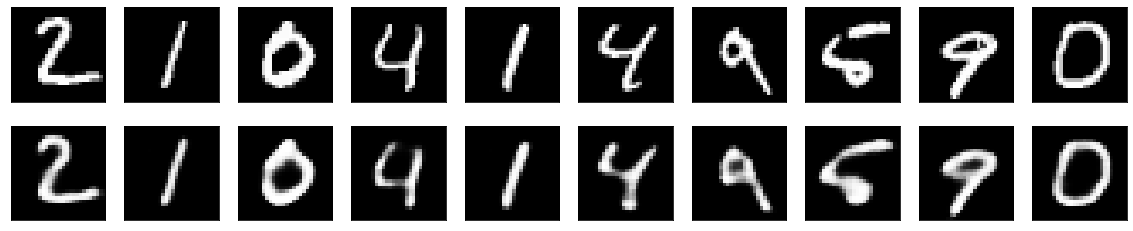

In [19]:
decoded_imgs = autoencoder.predict(X_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

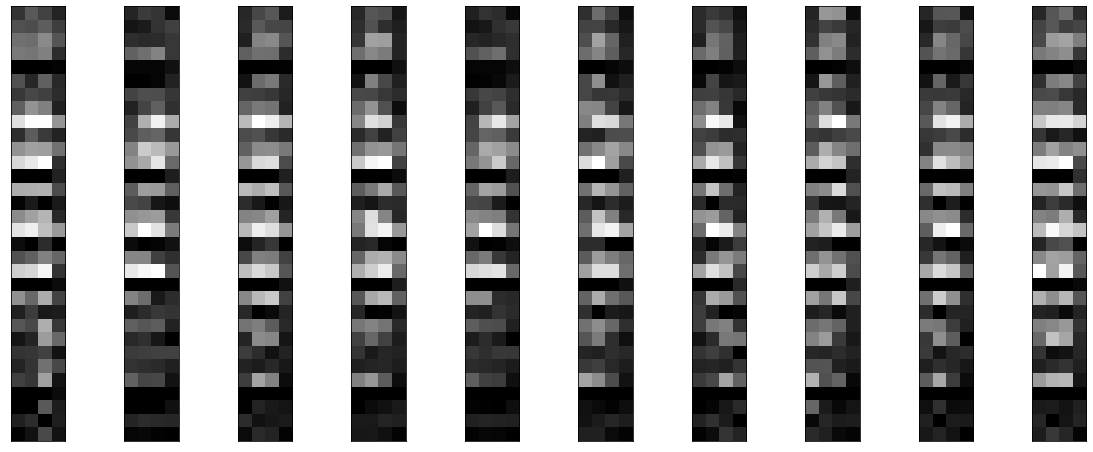

In [20]:
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(X_test)

n = 10
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape((4, 4 * 8)).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [21]:
noise_factor = 0.5
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape) 
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape) 

X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

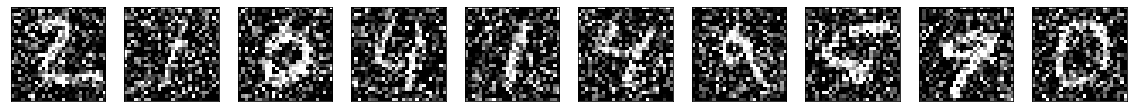

In [22]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(X_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

**Application to image denoising**

In [23]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [24]:
autoencoder.fit(
    X_train_noisy, X_train,
    epochs=100,
    batch_size=128,
    shuffle=True,
    validation_data=(X_test_noisy, X_test),
)

Epoch 1/100
469/469 [==============================] - 47s 61ms/step - loss: 0.2384 - val_loss: 0.1163
Epoch 2/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1152 - val_loss: 0.1095
Epoch 3/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1084 - val_loss: 0.1046
Epoch 4/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1050 - val_loss: 0.1027
Epoch 5/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1031 - val_loss: 0.1014
Epoch 6/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1020 - val_loss: 0.1005
Epoch 7/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1010 - val_loss: 0.1003
Epoch 8/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0999 - val_loss: 0.0987
Epoch 9/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0992 - val_loss: 0.0980
Epoch 10/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0988 - val_

469/469 [==============================] - 2s 4ms/step - loss: 0.0929 - val_loss: 0.0931
Epoch 82/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0930 - val_loss: 0.0930
Epoch 83/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0930 - val_loss: 0.0931
Epoch 84/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0929 - val_loss: 0.0931
Epoch 85/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0929 - val_loss: 0.0931
Epoch 86/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0931 - val_loss: 0.0931
Epoch 87/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0928 - val_loss: 0.0931
Epoch 88/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0930 - val_loss: 0.0931
Epoch 89/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0930 - val_loss: 0.0931
Epoch 90/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0931 - val_loss: 

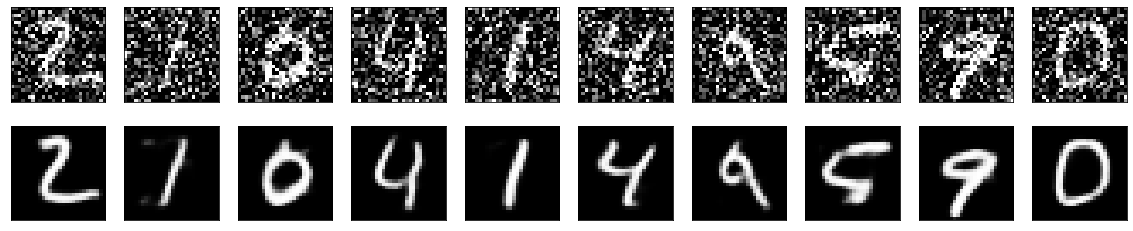

In [25]:
denoised_imgs = autoencoder.predict(X_test_noisy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(X_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(denoised_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()